In [147]:
# import libraries

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [148]:
IMG_PATH = './img/'

In [149]:
image = cv2.imread(IMG_PATH + 'solidWhiteRight.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

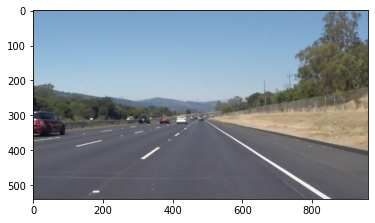

In [150]:
plt.imshow(image)

In [151]:
height = image.shape[0]
width = image.shape[1]

roi_vertices = [(0, height),
               (width/2, height/2),
               (width, height)]

In [152]:
def roi_mask(img, points):
    mask = np.zeros_like(img)
    #channel_count = img.shape[2]
    match_mask_color = 255
    cv2.fillPoly(mask, points, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image

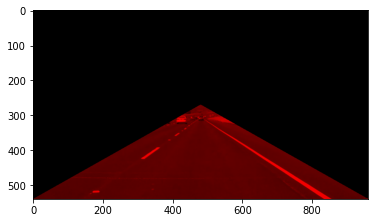

In [153]:
cropped_image = roi_mask(image, np.array([roi_vertices], np.int32))

plt.imshow(cropped_image)

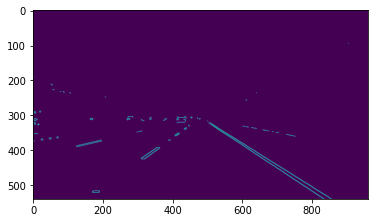

In [154]:
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
canny_image = cv2.Canny(gray_image, 350, 400)

plt.imshow(canny_image)

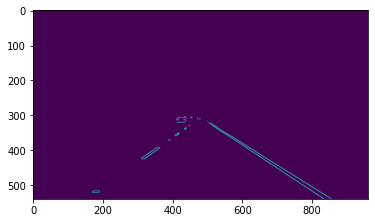

In [155]:
cropped_image = roi_mask(canny_image, np.array([roi_vertices], np.int32))

plt.imshow(cropped_image)

In [156]:
lines = cv2.HoughLinesP(cropped_image,
                       rho = 6,
                       theta = np.pi / 60,
                       threshold = 50,
                       lines = np.array([]),
                       minLineLength = 1,
                       maxLineGap = 25)

In [157]:
def draw_lines(img, lines):
    img_copy = img.copy()
    line_image = np.zeros((img_copy.shape[0], img_copy.shape[1], img_copy.shape[2]), dtype=np.uint8)
    
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 5)
    
    img_copy = cv2.addWeighted(img_copy, 0.8,line_image, 1, 0)
    
    return img_copy

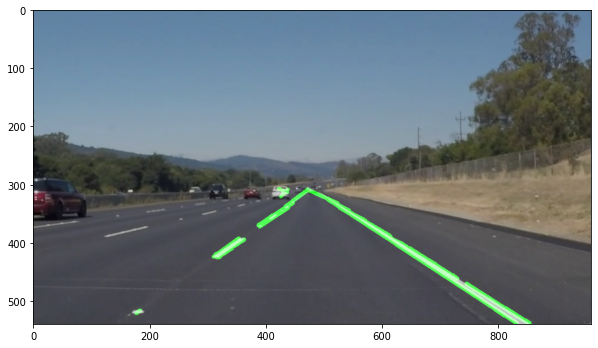

In [158]:
lane_image = draw_lines(image, lines)

plt.figure(figsize=(10,10))
plt.imshow(lane_image)